In [1]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
import urllib.request
print('Done!')


Done!


In [2]:
!conda install -c conda-forge geopy --yes 


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [3]:
!conda install -c conda-forge lxml --yes 
import lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               conda-forge/linux-64::lxml-3.8.0-py36_0



lxml-3.8.0           | 3.8 MB    | ##################################### | 100% 
libxslt-1.1.33       | 426 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
!conda install -c conda-forge BeautifulSoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge
    soupsieve-2.0.1            |   py36h9f0ad1d_0          56 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         219 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.1-py36h9f0ad1d_0
  soupsieve          conda-forge/linux-64::soupsieve-2.0.1-py36h9f0ad1d_0



beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
soupsieve-2.0.1      | 56 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction

In [5]:
from bs4 import BeautifulSoup

In [6]:
from geopy.geocoders import Nominatim 

In [17]:
#Functions
CLIENT_ID = 'UB3BYHCNZZG0N4UIO0IDOAVWSQVOKFIQV3D44GOUMYILENLE' # your Foursquare ID
CLIENT_SECRET = '5LWFI0VVOINZMYDFMTESC2OWNFXIW4CR3UBWYJ13Y4LXA3ES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df



def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data



In [8]:
ny_data = get_new_york_data()
ny_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
ny_data.shape

(306, 4)

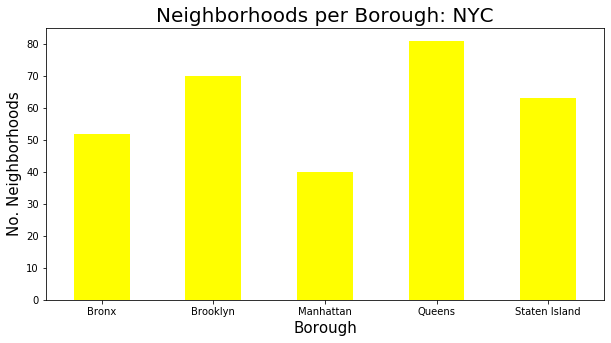

In [10]:
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color='yellow')
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [11]:
url = "https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
soup.prettify()
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]

right_table=soup.find('table', class_='wikitable sortable')
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
       
df=pd.DataFrame(A,columns=['Rank'])
df['Borough']=B
df['City']=C
df['Indian Americans']=D
df['Density of Indian Americans per square mile']=E
df['Percentage of Indian Americans in municipalitys population']=F
df

Rank        Borough           City Indian Americans  \
0  1\n         Queens  New York City          144,896   
1  2\n       Brooklyn  New York City           25,270   
2  3\n      Manhattan  New York City           24,359   
3  4\n      The Bronx  New York City           16,748   
4  5\n  Staten Island  New York City            6,646   
5   \n   Total (2014)  New York City          227,994   

  Density of Indian Americans per square mile  \
0                                     1,326.5   
1                                       357.9   
2                                     1,060.9   
3                                       398.6   
4                                       113.6   
5                                       753.4   

  Percentage of Indian Americans in municipalitys population  
0                                                6.2          
1                                                1.0          
2                                                1.5          
3                                                1.2          
4                                                1.4          
5                                                2.7

In [12]:
df = df[['Borough','Indian Americans']]
newdf = df.set_index('Borough')
newdf

Indian Americans
Borough                       
Queens                 144,896
Brooklyn                25,270
Manhattan               24,359
The Bronx               16,748
Staten Island            6,646
Total (2014)           227,994

In [14]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(ny_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
['Bronx', 'Norwood',

In [62]:
indian_rest_ny.to_csv('indian_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare

In [18]:
indian_rest_ny = pd.read_csv('indian_rest_ny_tocsv1.csv')
indian_rest_ny.head()

Unnamed: 0   Borough Neighborhood                        ID  \
0           0     Bronx     Woodlawn  4c0448d9310fc9b6bf1dc761   
1           1     Bronx  Parkchester  55dfa36a498e164ef19bef7b   
2           2     Bronx    Unionport  4c194631838020a13e78e561   
3           3  Brooklyn    Bay Ridge  545835a1498e820edc6f636f   
4           4  Brooklyn   Greenpoint  51a5445c498ee0f182370cb2   

                          Name  
0                   Curry Spot  
1  Premium Sweets & Restaurant  
2  Melanies Roti Bar And Grill  
3                 Bombay Grill  
4               Agra Taj Mahal

In [19]:
indian_rest_ny.shape

(33, 5)

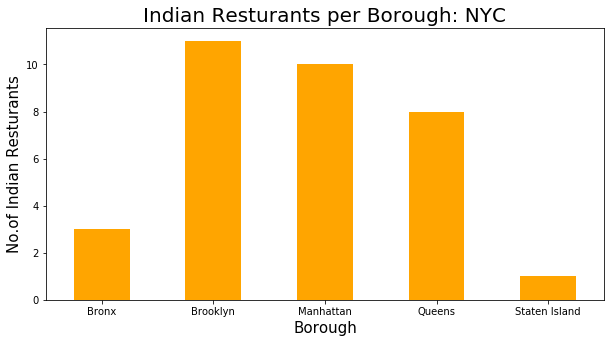

In [65]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = 'Orange')
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [12]:
indian_rest_ny[indian_rest_ny['Borough']=='Brooklyn']


Unnamed: 0   Borough               Neighborhood                        ID  \
3            3  Brooklyn                  Bay Ridge  545835a1498e820edc6f636f   
4            4  Brooklyn                 Greenpoint  51a5445c498ee0f182370cb2   
5            5  Brooklyn                   Bushwick  5169f5c4e4b0c7fcb77a0f3c   
6            6  Brooklyn           Brooklyn Heights  4b8ffc16f964a520246e33e3   
7            7  Brooklyn                    Gowanus  52f18573498ec2c34e830ffd   
8            8  Brooklyn                Fort Greene  57596dad498e732300496b23   
9            9  Brooklyn               Clinton Hill  568d3902498e619efcbc3f58   
10          10  Brooklyn               Clinton Hill  4ace7c86f964a520d3d020e3   
11          11  Brooklyn                Boerum Hill  543870ec498ec64de510608d   
12          12  Brooklyn  Prospect Lefferts Gardens  4bb93b70cf2fc9b6fe64a002   
13          13  Brooklyn                 North Side  5631511b498e3d6d7e0a4df0   

                          Name  
3                 Bombay Grill  
4               Agra Taj Mahal  
5                 Agra Heights  
6                Curry Heights  
7    Kanan's Indian Restaurant  
8                  Dosa Royale  
9                Spice & Grill  
10                    Kinara's  
11                Masala Grill  
12  Gandhi Fine Indian Cuisine  
13          Tikka Indian Grill

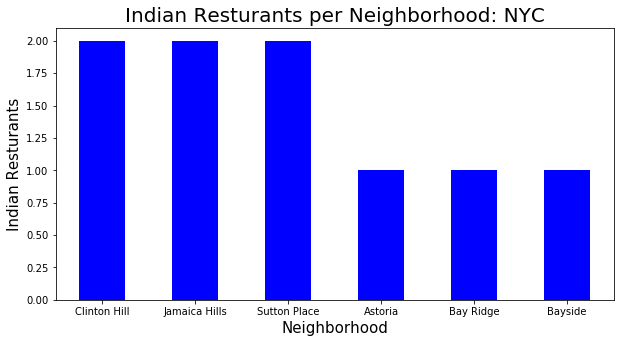

In [66]:
NOofNeigh = 6 # top number for graphing all the same past 6
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='Blue')
plt.title('Indian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()


In [28]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Clinton Hill']
indian_rest_ny = indian_rest_ny.drop(['Unnamed: 0'], axis=1)

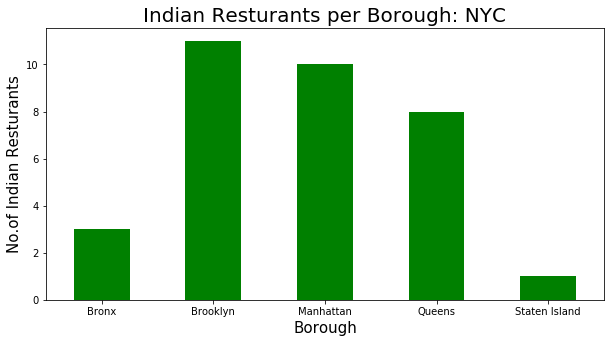

In [72]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = 'Green')
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

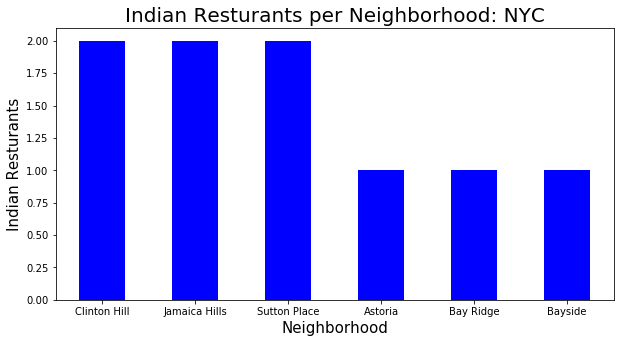

In [73]:
NOofNeigh = 6 # top number for graphing all the same past 6
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='Blue')
plt.title('Indian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [29]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.head()

{'meta': {'code': 200, 'requestId': '5ee25299226d4f12e8796abe'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}, {'label': 'entrance', 'lat': 40.897709, 'lng': -73.86707}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 

Borough Neighborhood                        ID  \
0     Bronx     Woodlawn  4c0448d9310fc9b6bf1dc761   
1     Bronx  Parkchester                         0   
2     Bronx    Unionport  4c194631838020a13e78e561   
3  Brooklyn    Bay Ridge  545835a1498e820edc6f636f   
4  Brooklyn   Greenpoint  51a5445c498ee0f182370cb2   

                          Name Likes  Rating Tips  
0                   Curry Spot     5     7.8   10  
1                            0     0     0.0    0  
2  Melanies Roti Bar And Grill     3     6.0    2  
3                 Bombay Grill    14     7.1    4  
4               Agra Taj Mahal    34     7.3   16

In [30]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv.csv')

In [31]:
indian_rest_stats_ny.shape

(33, 7)

In [32]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       33 non-null     object 
 1   Neighborhood  33 non-null     object 
 2   ID            33 non-null     object 
 3   Name          33 non-null     object 
 4   Likes         33 non-null     object 
 5   Rating        33 non-null     float64
 6   Tips          33 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


In [33]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       33 non-null     object 
 1   Neighborhood  33 non-null     object 
 2   ID            33 non-null     object 
 3   Name          33 non-null     object 
 4   Likes         33 non-null     float64
 5   Rating        33 non-null     float64
 6   Tips          33 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


In [34]:
indian_rest_stats_ny.describe()

Likes     Rating        Tips
count   33.000000  33.000000   33.000000
mean    67.424242   6.930303   23.909091
std    127.882766   2.371772   35.492397
min      0.000000   0.000000    0.000000
25%     10.000000   7.100000    6.000000
50%     25.000000   7.700000   14.000000
75%     62.000000   8.200000   20.000000
max    590.000000   8.800000  148.000000

In [35]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               8.6
Tips                                 148
Name: 21, dtype: object

In [36]:
# Resturant with maximum Ratings
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              57596dad498e732300496b23
Name                         Dosa Royale
Likes                                 77
Rating                               8.8
Tips                                  22
Name: 8, dtype: object

In [37]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
7                 Fort Greene             8.8
20  Prospect Lefferts Gardens             8.7
24                    Tribeca             8.6
23               Sutton Place             8.4
18                 North Side             8.4
17                   New Dorp             8.3
10          Greenwich Village             8.2
2                     Bayside             8.2
27         Washington Heights             8.0
3                 Boerum Hill             8.0

In [38]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
4  Staten Island        8.300000
2      Manhattan        8.000000
1       Brooklyn        7.445455
3         Queens        5.587500
0          Bronx        4.600000

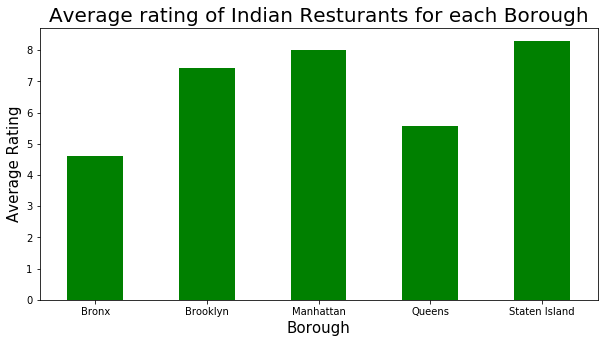

In [39]:
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color='green')
plt.title('Average rating of Indian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [40]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

Neighborhood  Average Rating
2                     Bayside             8.2
3                 Boerum Hill             8.0
7                 Fort Greene             8.8
10          Greenwich Village             8.2
17                   New Dorp             8.3
18                 North Side             8.4
20  Prospect Lefferts Gardens             8.7
23               Sutton Place             8.4
24                    Tribeca             8.6
27         Washington Heights             8.0

In [41]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

Borough               Neighborhood   Latitude  Longitude  \
0         Queens                    Bayside  40.766041 -73.774274   
1       Brooklyn                Boerum Hill  40.685683 -73.983748   
2       Brooklyn                Fort Greene  40.688527 -73.972906   
3      Manhattan          Greenwich Village  40.726933 -73.999914   
4  Staten Island                   New Dorp  40.572572 -74.116479   
5       Brooklyn                 North Side  40.714823 -73.958809   
6       Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899   
7      Manhattan               Sutton Place  40.760280 -73.963556   
8      Manhattan                    Tribeca  40.721522 -74.010683   
9      Manhattan         Washington Heights  40.851903 -73.936900   

   Average Rating  
0             8.2  
1             8.0  
2             8.8  
3             8.2  
4             8.3  
5             8.4  
6             8.7  
7             8.4  
8             8.6  
9             8.0

In [42]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
ny_map

In [43]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)
ny_map

In [44]:
y_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = 'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

ny_map

In [45]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='PuBu', #'YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

ny_map